# Project Description #

# Content <a id='back'></a>

* [Introduction](#intro)
* [Stage 1. Exploratory Data Analysis (EDA)](#data_review)
    * [1.1 Observations](#data_review)
    * [1.2 Observations](#data_review)
* [Stage 2. Data Preprocessing](#data_preprocessing)
* [Stage 3. Data Processing](#data_processing)
    * [3.1 Observations](#activity)
    * [3.2 Observations](#activity)
    * [3.3 Results](#activity)
* [Stage 4. Hypothesis Testing](#hypothesis)
    * [5.1 Observations](#activity)
    * [5.2 Hypothesis Formulation](#activity)
    * [5.3 Significance Level](#activity)
    * [5.4 Criteria for Testing Hypotheses](#activity)
    * [5.5 Hypothesis Testing Procedure](#activity)
    * [5.6 Observations](#activity)
* [General Conclusion](#end)

## Introduction <a id='intro'></a>

You are working as an analyst for Zuber, a new ride-sharing company launching in Chicago. Your task is to identify patterns in the available data. You aim to understand passenger preferences and the impact of external factors on rides.

By working with a database, you will analyze competitor data and test a hypothesis about the impact of weather on ride frequency.

## Stage 1. Data Description <a id='data_review'></a>

In [47]:
# Load all libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import factorial
from scipy import stats as st
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import levene

The following DataFrame `cnt_trips` contains the following data:

* `company_name`: name of the taxi company

* `trips_amount`: the number of trips made by each taxi company on November 15 and 16, 2017.

In [48]:
# Read the data

# Use a raw string for the path
file_path = '/datasets/project_sql_result_01.csv'

# Read the CSV file
cnt_trips = pd.read_csv(file_path)

# Display the first rows of the DataFrame
cnt_trips.info()
print('\n')
display(cnt_trips.head())
print('\n')
cnt_trips.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB




,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


### Observations ###

* Class: The object is a pandas DataFrame.
* Range Index: The DataFrame has a range index from 0 to 63, indicating a total of 64 rows.
* Columns: There are 2 columns in the DataFrame.

    Columns and data types:
    * company_name: This column contains 64 non-null values of type object. This suggests that the values are likely text strings.
    * trips_amount: This column contains 64 non-null values of type int64. This indicates that the values are integers.
    * Memory usage: The DataFrame occupies approximately 1.1 KB of memory.
* The column headers are in lowercase and correctly separated.

In [49]:
# Check for missing values
cnt_trips_values_before = cnt_trips.isna().sum()

print("Valores ausentes antes de la conversión:")
print(cnt_trips_values_before)

Valores ausentes antes de la conversión:
company_name    0
trips_amount    0
dtype: int64


The following DataFrame `chicago_trips` contains the following data:

* `dropoff_location_name`: neighborhoods in Chicago where trips ended.

* `average_trips`: the average number of trips that ended in each neighborhood in November 2017.

In [50]:
# Read the data

# Use a raw string for the path
file_path = '/datasets/project_sql_result_04.csv'

# Read the CSV file
avg_chicago_trips = pd.read_csv(file_path)

# Display the first rows of the DataFrame
avg_chicago_trips.info()
print('\n')
display(avg_chicago_trips.head())
print('\n')
avg_chicago_trips.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB




,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


### Observations ###

* Class: The object is a pandas DataFrame.
* Range index: The DataFrame has a range index from 0 to 93, indicating a total of 94 rows.
* Columns: There are 2 columns in the DataFrame.

    Columns and data types:
    * dropoff_location_name: This column contains 94 non-null values of type object. This suggests the values are likely text strings representing drop-off location names.
    * average_trips: This column contains 94 non-null values of type float64. This indicates the values are floating-point numbers, probably representing the average number of trips.
    * Memory usage: The DataFrame occupies approximately 1.6 KB of memory.
* Column headers are in lowercase and properly separated.

## Stage 2. Data Preprocessing <a id='data_preprocessing'></a>

In [51]:
# Check for missing values
avg_chicago_trips_values_before = avg_chicago_trips.isna().sum()

print("Valores ausentes antes de la conversión:")
print(avg_chicago_trips_values_before)

Valores ausentes antes de la conversión:
dropoff_location_name    0
average_trips            0
dtype: int64


In [52]:
# Validate duplicate values

duplicated_cnt_trips = cnt_trips.duplicated().sum()
if duplicated_cnt_trips == 0:
    print(f'No hay valores duplicados en el DataFrame cnt_trips')

duplicated_avg_chicago_trips = avg_chicago_trips.duplicated().sum()
if duplicated_avg_chicago_trips == 0:
    print(f'No hay valores duplicados en el DataFrame avg_chicago_trips')

No hay valores duplicados en el DataFrame cnt_trips
No hay valores duplicados en el DataFrame avg_chicago_trips


## Stage 3. Data Processing <a id='data_processing'></a>

In [53]:
# Sort neighborhoods by the average number of trips in descending order
top_neighborhoods = avg_chicago_trips.sort_values(by='average_trips', ascending=False)

# Select the top 10 neighborhoods
top_10_neighborhoods = top_neighborhoods.head(10)

print(top_10_neighborhoods)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


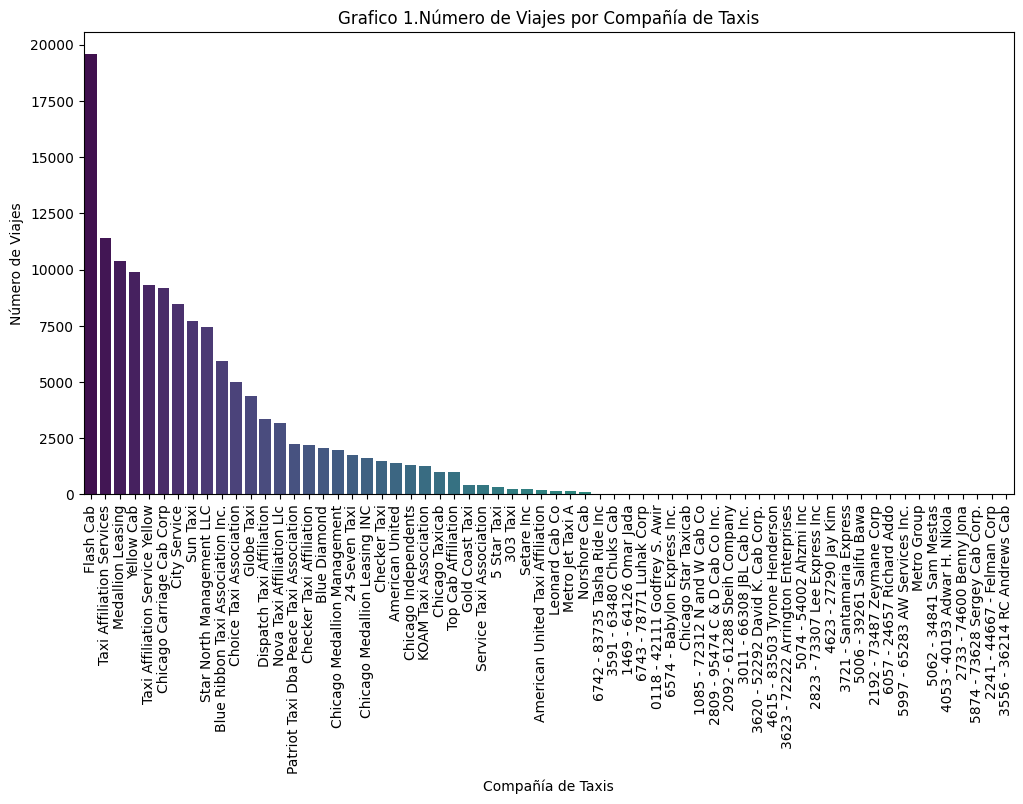

In [54]:
# Create the bar chart for taxi companies
plt.figure(figsize=(12, 6))
sns.barplot(x='company_name', y='trips_amount', data=cnt_trips, palette='viridis')
plt.title('Grafico 1.Número de Viajes por Compañía de Taxis')
plt.xlabel('Compañía de Taxis')
plt.ylabel('Número de Viajes')
plt.xticks(rotation=90)
plt.show()

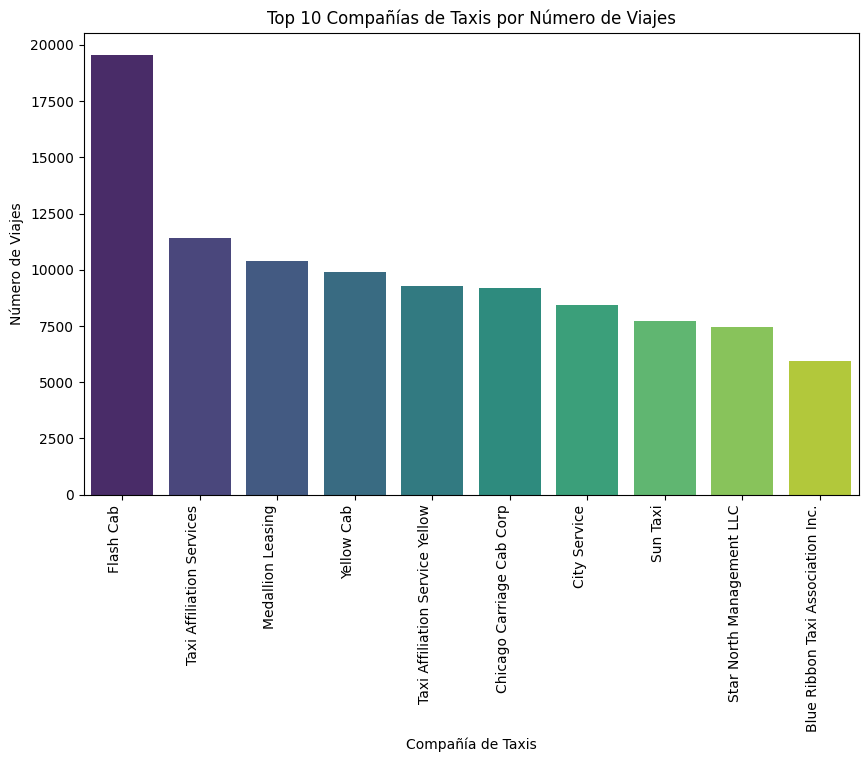

In [55]:
# Sort the companies by the number of trips in descending order
sorted_cnt_trips = cnt_trips.sort_values(by='trips_amount', ascending=False)

# Select the top 10 companies
top_10_companies = sorted_cnt_trips.head(10)

# Create bar chart for the top 10
plt.figure(figsize=(10, 6))
sns.barplot(x='company_name', y='trips_amount', data=top_10_companies, palette='viridis')
plt.xticks(rotation=90, ha='right')
plt.title('Top 10 Compañías de Taxis por Número de Viajes')
plt.xlabel('Compañía de Taxis')
plt.ylabel('Número de Viajes')
plt.show()

### Observations ###

Concentration of Trips in a Few Companies:

* Most trips are concentrated in a small number of taxi companies. Flash Cab is the company with the highest number of trips, followed by Taxi Affiliation Services and Medallion Leasin. This suggests that these companies have a larger market share or are more popular among users.

Competition Among Companies:

* There are many companies with a significantly lower number of trips, indicating considerable competition in the taxi market. Smaller companies have fewer trips, which could be a challenge for them in terms of profitability and sustainability.

Market Opportunities:

* Companies with fewer trips may have growth opportunities if they manage to differentiate themselves or improve their services. There could also be room for new marketing strategies or collaborations to increase their market share.

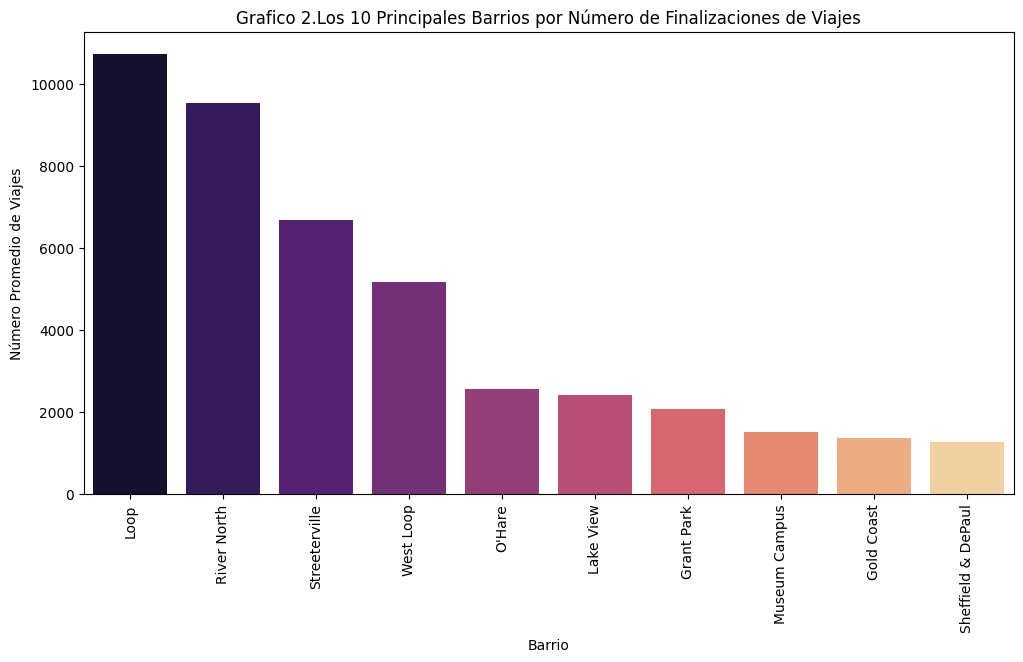

In [56]:
# Create the bar chart for the top 10 neighborhoods by number of completions
plt.figure(figsize=(12, 6))
sns.barplot(x='dropoff_location_name', y='average_trips', data=top_10_neighborhoods, palette='magma') 
plt.title('Grafico 2.Los 10 Principales Barrios por Número de Finalizaciones de Viajes')
plt.xlabel('Barrio')
plt.ylabel('Número Promedio de Viajes')
plt.xticks(rotation=90)
plt.show()

### Observations ###

Neighborhoods with the Most Activity:

* Loop, River North, and Streeterville are the neighborhoods with the highest average number of trip completions. This suggests that these neighborhoods are high-demand areas for taxi transportation, possibly due to the presence of offices, businesses, tourist attractions, or transportation hubs.

Demand Distribution:

* Demand gradually decreases after the first three neighborhoods, but there is still considerable activity in West Loop and O'Hare. This shows a spread of taxi demand across various points in the city, though with a higher concentration in certain key neighborhoods.

Strategies for Taxi Companies:

* Taxi companies can focus on these high-demand neighborhoods to maximize their number of trips. This may include strategic taxi allocation, special promotions, or partnerships with local businesses to attract more customers.

Urban Planning and Public Transportation:

* The high demand in certain neighborhoods could also indicate the need to improve public transportation infrastructure in those areas to alleviate congestion and enhance mobility.

### Results ###

In summary, the analysis of the graphs suggests that:

* There is a high concentration of trips among a few taxi companies, indicating strong competition in the market.
* Neighborhoods with the most taxi activity are likely economic and social hubs, which could guide market and operational strategies for taxi companies.
* Improving transportation infrastructure in high-demand areas can benefit both residents and taxi companies.

## Stage 4. Hypothesis Testing <a id='#hypothesis'></a>

The following DataFrame `Loop_to_Airport_OHare_trips` contains data on trips from the Loop to O'Hare International Airport. Distributed as follows:

* start_ts: date and time of pickup
* weather_conditions: weather conditions at the time the trip began
* duration_seconds: duration of the trip in seconds

In [57]:
# Read the data

# Use a raw string for the path
file_path = '/datasets/project_sql_result_07.csv'

# Read the CSV file
Loop_to_Airport_OHare_trips = pd.read_csv(file_path)

# Display the first rows of the DataFrame
Loop_to_Airport_OHare_trips.info()
print('\n')
display(Loop_to_Airport_OHare_trips.head())
print('\n')
Loop_to_Airport_OHare_trips.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB




,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


### Observations ###

Range index:

* The DataFrame has a range index from 0 to 1067, indicating that there are 1068 rows.

Columns and data types:

The DataFrame has 3 columns:
* start_ts: Contains non-null object data. This column seems to represent timestamps but is currently in string format.
* weather_conditions: Contains non-null object data. This column appears to represent weather conditions and is in string format.
* duration_seconds: Contains non-null float64 data. This column represents the duration in seconds and is in floating-point format.

Memory usage:

* The DataFrame uses approximately 25.2 KB of memory.

In [58]:
# Check for missing values
Loop_to_Airport_OHare_trips_values_before = Loop_to_Airport_OHare_trips.isna().sum()

print("Valores ausentes antes de la conversión:")
print(Loop_to_Airport_OHare_trips_values_before)

Valores ausentes antes de la conversión:
start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


In [59]:
# Validate duplicate values

duplicated_Loop_to_Airport_OHare_trips = Loop_to_Airport_OHare_trips.duplicated().sum()
if duplicated_Loop_to_Airport_OHare_trips == 0:
    print(f'No hay valores duplicados en el DataFrame cnt_trips')
else:
    print(f'Hay {duplicated_Loop_to_Airport_OHare_trips} valores duplicados en el DataFrame Loop_to_Airport_OHare_trips')

Hay 197 valores duplicados en el DataFrame Loop_to_Airport_OHare_trips


In [60]:
# Remove duplicate rows, keeping the first occurrence
Loop_to_Airport_OHare_trips = Loop_to_Airport_OHare_trips.drop_duplicates(keep='first')

# Reset the index
Loop_to_Airport_OHare_trips.reset_index(drop=True, inplace=True)

# Check the result
print(f"Número de filas después de eliminar duplicados: {len(Loop_to_Airport_OHare_trips)}\n")

# Print the data types and a sample of the cleaned DataFrame
print(Loop_to_Airport_OHare_trips.info())
print('\n')
display(Loop_to_Airport_OHare_trips.head())

Número de filas después de eliminar duplicados: 871

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            871 non-null    object 
 1   weather_conditions  871 non-null    object 
 2   duration_seconds    871 non-null    float64
dtypes: float64(1), object(2)
memory usage: 20.5+ KB
None




,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [61]:
# Convert start_ts to datetime
Loop_to_Airport_OHare_trips['start_ts'] = pd.to_datetime(Loop_to_Airport_OHare_trips['start_ts'])

# Convert weather_conditions to category
Loop_to_Airport_OHare_trips['weather_conditions'] = Loop_to_Airport_OHare_trips['weather_conditions'].astype('category')

# Check consistency in weather_conditions (e.g., all lowercase)
Loop_to_Airport_OHare_trips['weather_conditions'] = Loop_to_Airport_OHare_trips['weather_conditions'].str.lower()

# Print the data type and a sample of the cleaned and restructured DataFrame
print(Loop_to_Airport_OHare_trips.info())
print('\n')
display(Loop_to_Airport_OHare_trips.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 20.5+ KB
None




,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,good,2410.0
1,2017-11-25 14:00:00,good,1920.0
2,2017-11-25 12:00:00,good,1543.0
3,2017-11-04 10:00:00,good,2512.0
4,2017-11-11 07:00:00,good,1440.0


### Hypothesis Formulation ###

Null Hypothesis (𝐻0): The average duration of trips on rainy Saturdays is equal to the average duration of trips on Saturdays with other weather conditions. In other words, rainy weather does not affect the average duration of trips on Saturdays.

                                                𝐻0:𝜇rainy Saturdays = 𝜇non-rainy Saturdays

 
Alternative Hypothesis (𝐻1): The average duration of trips on rainy Saturdays is different from the average duration of trips on Saturdays with other weather conditions. In other words, rainy weather affects the average duration of trips on Saturdays.

                                                𝐻1:𝜇rainy Saturdays ≠ 𝜇non-rainy Saturdays
 
### Significance Level ###
We will set the significance level (𝛼) to 0.05, which is commonly used in hypothesis testing.

### Criteria for Testing Hypotheses ###

An independent samples t-test (ttest_ind) was used to compare the means of two independent groups: Saturdays with good weather conditions and Saturdays with bad weather conditions. The independent samples t-test is appropriate for this type of comparison when:

* There are two independent groups.
* The data is approximately normally distributed (although the t-test is quite robust to moderate violations of this assumption).
* The variances of the two groups may differ (we use equal_var=False to account for this).

Decision

The p-value obtained is compared with the significance level 𝛼:

* If the p-value < 𝛼: We reject the null hypothesis. This indicates that there is sufficient evidence to claim that the average duration of trips is significantly different between Saturdays with good and bad conditions.
* If the p-value ≥ 𝛼: We do not reject the null hypothesis. This indicates that there is insufficient evidence to claim that the average duration of trips is different between the two types of Saturdays.

### Procedure for Testing Hypotheses ###

* Filter the Data: Select data corresponding to Saturdays and classify them as rainy or non-rainy.
* Calculate Descriptive Statistics: Calculate the mean and standard deviation of trip durations for both groups.
* Perform the Statistical Test: We will use an independent samples t-test to compare the means of the two groups, as we want to determine if there is a significant difference in the average trip durations between the two groups.
* Make the Decision: Based on the p-value obtained from the t-test, compare it with the significance level (𝛼) to decide whether or not to reject the null hypothesis.

In [62]:
# Filter Saturdays
df_saturdays = Loop_to_Airport_OHare_trips[Loop_to_Airport_OHare_trips['start_ts'].dt.dayofweek == 5]

# Classify into good and bad conditions
df_saturdays_good = df_saturdays[df_saturdays['weather_conditions'] == 'good']
df_saturdays_bad = df_saturdays[df_saturdays['weather_conditions'] == 'bad']

# Calculate descriptive statistics
mean_good = df_saturdays_good['duration_seconds'].mean()
mean_bad = df_saturdays_bad['duration_seconds'].mean()
std_good = df_saturdays_good['duration_seconds'].std()
std_bad = df_saturdays_bad['duration_seconds'].std()
n_good = df_saturdays_good['duration_seconds'].count()
n_bad = df_saturdays_bad['duration_seconds'].count()

# Perform the Levene's test
levene_stat, levene_p = levene(df_saturdays_good['duration_seconds'], df_saturdays_bad['duration_seconds'])

# Determine if the variances are equal
equal_var = levene_p > 0.05

# Perform the independent t-test
t_stat, p_value = st.ttest_ind(df_saturdays_good['duration_seconds'], df_saturdays_bad['duration_seconds'], equal_var=equal_var)

# Results
print(f"Media (buenas condiciones): {mean_good}")
print(f"Media (malas condiciones): {mean_bad}")
print(f"Desviación estándar (buenas condiciones): {std_good}")
print(f"Desviación estándar (malas condiciones): {std_bad}")
print(f"Valor t: {t_stat}")
print(f"Valor p: {p_value}")

# Make the decision
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: La duración promedio de los viajes los sábados con malas condiciones es significativamente diferente a la de los sábados con buenas condiciones.")
else:
    print("No rechazamos la hipótesis nula: No hay evidencia suficiente para afirmar que la duración promedio de los viajes los sábados con malas condiciones es diferente a la de los sábados con buenas condiciones.")

Media (buenas condiciones): 2032.253112033195
Media (malas condiciones): 2409.2297297297296
Desviación estándar (buenas condiciones): 773.4448597547353
Desviación estándar (malas condiciones): 751.5447049004283
Valor t: -5.427957689754561
Valor p: 7.397770692813658e-08
Rechazamos la hipótesis nula: La duración promedio de los viajes los sábados con malas condiciones es significativamente diferente a la de los sábados con buenas condiciones.


### Observations ###

Average Trip Duration: Trips made in bad weather conditions (2409.23 seconds) have a significantly longer average duration than trips made in good weather conditions (2032.25 seconds).

Statistically Significant Difference: The p-value (7.397770692813658e-08) is much smaller than the adopted significance level (0.05). This indicates that the observed difference in the average trip durations under different weather conditions is not due to random chance.

Standard Deviations: The standard deviations are relatively similar in both conditions (773.44 seconds in good weather and 751.54 seconds in bad weather), suggesting that the variability in trip durations is comparable in both scenarios.

Rejection of the Null Hypothesis: Given the negative t-value and the extremely low p-value, we reject the null hypothesis. This confirms that there is a significant difference in the average trip duration between Saturdays with good and bad weather conditions.

Implications:
Impact of Weather on Trip Duration: Bad weather conditions significantly prolong trip durations. This could be due to factors such as slower traffic, increased caution while driving, and potential disruptions or detours.

Planning and Resources: Taxi companies may need to plan for additional resources or adjust their trip time expectations on days with bad weather to maintain efficiency and customer satisfaction.

Operational Strategies: Considering the impact of weather on trip duration can help taxi companies improve their operational and planning strategies, particularly in terms of fleet management and driver scheduling.

 ## General Conclusion <a id='#end'></a>

Concentration of Trips in a Few Companies:

Most taxi trips are concentrated in a few companies, particularly Flash Cab, Taxi Affiliation Services, and Medallion Leasin. These companies dominate the market, likely due to their popularity and larger market share. This suggests that they are preferred by users, possibly due to factors such as service quality, availability, and price.

Competition Between Companies:

There are many taxi companies with a significantly smaller number of trips, reflecting strong competition in the market. Smaller companies face considerable challenges in terms of profitability and sustainability. They need to find ways to differentiate themselves to capture a larger market share.

Market Opportunities:

Taxi companies with fewer trips have growth opportunities if they can improve their services or implement new marketing strategies. Collaborations with other businesses or special promotions could help them increase their customer base and market share.

Demand in High-Activity Neighborhoods:

Neighborhoods with the highest number of taxi trips, such as Loop, River North, and Streeterville, are likely centers of economic and social activity. This suggests that taxi companies' marketing and operations strategies should focus on these areas to maximize their efficiency and profitability.

Transport Infrastructure:

The high demand for taxis in certain neighborhoods indicates the need to improve public transport infrastructure in these areas. This would not only alleviate congestion but also improve mobility and quality of life for residents, benefiting taxi companies by reducing wait times and increasing customer satisfaction.

Statistical Analysis of Trip Duration on Saturdays

Average Duration and Variability:

The average trip duration on Saturdays in good weather is 2032.25 seconds, with a standard deviation of 773.44 seconds, while in bad weather, the average duration is 2409.23 seconds, with a standard deviation of 751.54 seconds. This indicates that trips are longer in bad weather, likely due to factors such as traffic and weather conditions.

Significance Analysis:

The t-value of -5.427 and the p-value of 7.398e-08 suggest that the difference in average trip duration between good and bad weather conditions is statistically significant. This leads us to reject the null hypothesis that there is no difference in the average trip duration between these two scenarios.

Final Summary:

The analysis shows that a few companies dominate the taxi market, with strong competition among many smaller companies. Small companies have opportunities for growth through service improvements and new marketing strategies. Taxi demand is high in certain key neighborhoods, suggesting that companies should focus their efforts in these areas. Additionally, improving transport infrastructure in high-demand areas will benefit both residents and taxi companies. The statistical analysis reveals that trip durations are significantly longer in bad weather, which should be considered when planning operations and strategies.